# Predicting Kidney Disease using Machine Learning

This notebook will introduce some foundational machine learning and data science concepts by exploring the problem of kidney disease classification.

It is intended to be an end-to-end example of what a data science and machine learning proof of concept might look like.

## What is classification?

Classification involves deciding whether a sample is part of one class or another (**single-class classification**). If there are multiple class options, it's referred to as **multi-class classification**.


## What we'll end up with

Since we already have a dataset, we'll approach the problem with the following machine learning modelling framework.

| <img src="../images/ml101-6-step-ml-framework.png" width=500/> | 
|:--:| 
| 6 Step Machine Learning Modelling Framework |

More specifically, we'll look at the following topics.

* **Exploratory data analysis (EDA)** - the process of going through a dataset and finding out more about it.
* **Data Preprocessing** - handling missing values, converting categorical variables, and scaling numerical features.
* **Model training** - creating models to learn to predict kidney disease based on various health indicators.
* **Model evaluation** - evaluating model predictions using accuracy, precision, recall, and F1-score.
* **Model comparison** - comparing different machine learning algorithms to find the best performer.
* **Model fine-tuning** - once we've found a good model, how can we improve it?
* **Feature importance** - identifying which features are most significant for predicting kidney disease.
* **Cross-validation** - ensuring our model performs well on unseen data.
* **Reporting Results** - summarizing findings and visualizing model performance.

To work through these topics, we'll use pandas, Matplotlib and NumPy for data anaylsis, as well as, Scikit-Learn for machine learning and modelling tasks.

| <img src="../images/supervised-projects-6-step-ml-framework-tools-highlight.png" width=500/> | 
|:--:| 
| Tools which can be used for each step of the machine learning modelling process. |

By the end of this notebook, we will have trained and evaluated several models to predict kidney disease with considerable accuracy. Additionally, we will identify which health indicators contribute the most to the prediction process.

## 1. Problem Definition
In our case, the problem we will be exploring is binary classification (a sample can only be one of two things).

This is because we're going to be using a number of different features (pieces of information) about a person to predict whether they have kidney disease or not.

In a statement,

> Given clinical parameters about a patient, can we predict whether or not they have kidney disease?

## 2. Data

What you'll want to do here is dive into the data your problem definition is based on. This may involve sourcing, defining different parameters, talking to experts about it, and finding out what you should expect.

The dataset was sourced from Kaggle, which provides a well-structured collection of medical data for kidney disease prediction.

The dataset contains various health indicators, including blood pressure, hemoglobin levels, protein levels in urine, and more. Our target variable is whether or not a person has chronic kidney disease (ckd).

The dataset includes 25 attributes (features), which represent medical and lifestyle factors that may contribute to kidney disease. These are also referred to as independent variables, while the target variable (presence or absence of kidney disease) is the dependent variable.

> We use the independent variables to predict our dependent variable.

In this case, the independent variables consist of different health metrics, while the dependent variable indicates whether or not a person has kidney disease.

## 3. Evaluation

At the start of a project, defining an evaluation metric helps guide the development process.

Given the experimental nature of machine learning, we might set a benchmark such as:

> Achieving 95% accuracy in predicting kidney disease during the proof of concept will determine whether we proceed further with this project.

This provides a clear objective for machine learning engineers and data scientists to strive for.

However, as experimentation progresses, the evaluation metric may be adjusted based on findings and practical considerations.

## 4. Features

Features are the various components of the dataset that contribute to making predictions. 

A common way to document features is by creating a **data dictionary**.

## Description
The data was taken over a 2-month period in India with 25 features ( eg, red blood cell count, white blood cell count, etc). The target is the 'classification', which is either 'ckd' or 'notckd' - ckd=chronic kidney disease. Use machine learning techniques to predict if a patient is suffering from a chronic kidney disease or not.

Credit goes to Mansoor Iqbal (https://www.kaggle.com/mansoordaku) from where the dataset has been collected. For the purpose of creating a challenge, certain modifications have been done to the dataset.

Original dataset can be acquired from the link Chronic KIdney Disease (https://www.kaggle.com/mansoordaku/ckdisease)

### Kidney Disease Data Dictionary

A data dictionary helps define the key attributes in a dataset. Not all datasets come with one, so conducting research or consulting a subject matter expert (someone knowledgeable in the field) can be necessary.

Below are the features used to predict our target variable (kidney disease or no kidney disease):

1. age - Age of the patient in years.
2. bp - Blood pressure in mm/Hg (High blood pressure can contribute to kidney disease).
3. sg - Specific gravity of urine (measures kidney’s ability to concentrate urine; abnormalities may indicate kidney issues).
4. al - Albumin levels in urine (higher levels may indicate kidney disease due to protein leakage).
5. su - Sugar levels in urine (abnormal levels may be linked to diabetes, which is a risk factor for kidney disease).
6. rbc - Red blood cell count in urine (low count may indicate kidney filtering issues).
7. pc - Pus cell count (presence of pus cells can indicate infection or inflammation in the kidneys).
8. pcc - Presence of pus cell clumps (associated with urinary tract or kidney infections).
9. ba - Presence of bacteria in urine (signs of urinary tract infection that may affect kidney function).
10. bgr - Blood glucose random test result (high levels can be a sign of diabetes, a major risk factor for kidney disease).
11. bu - Blood urea levels (high levels indicate poor kidney function).
12. sc - Serum creatinine levels (an important indicator of kidney function, with high levels suggesting impaired function).
13. sod - Sodium levels in blood (imbalanced sodium levels can indicate kidney dysfunction).
14. pot - Potassium levels in blood (kidneys help regulate potassium levels; abnormal levels may indicate kidney issues).
15. hemo - Hemoglobin levels (low hemoglobin may indicate anemia, which is common in kidney disease patients).
16. pcv - Packed cell volume (percentage of blood composed of red cells, useful for diagnosing anemia related to kidney disease).
17. wc - White blood cell count (high counts may indicate infections or inflammation affecting the kidneys).
18. rc - Red blood cell count (helps assess overall blood health and kidney function).
19. htn - Hypertension (yes or no; high blood pressure is a key contributor to kidney disease).
20. dm - Diabetes mellitus (yes or no; diabetes is one of the leading causes of kidney failure).
21. cad - Coronary artery disease (yes or no; cardiovascular health is closely linked to kidney disease progression).
22. appet - Appetite (good or poor; loss of appetite is a common symptom of kidney disease).
23. pe - Presence of pedal edema (yes or no; swelling in the lower limbs due to fluid retention, common in kidney disease patients).
24. ane - Anemia (yes or no; kidney disease can lead to decreased red blood cell production, causing anemia).
25. class - Presence or absence of chronic kidney disease (ckd or notckd) → Target variable.

## Preparing the tools

At the start of any project, it's custom to see the required libraries imported in a big chunk like you can see below.

However, in practice, your projects may import libraries as you go. After you've spent a couple of hours working on your problem, you'll probably want to do some tidying up. This is where you may want to consolidate every library you've used at the top of your notebook (like the cell below).

The libraries you use will differ from project to project. But there are a few which will you'll likely take advantage of during almost every structured data project. 

* [pandas](https://pandas.pydata.org/) for data analysis.
* [NumPy](https://numpy.org/) for numerical operations.
* [Matplotlib](https://matplotlib.org/)/[seaborn](https://seaborn.pydata.org/) for plotting or data visualization.
* [Scikit-Learn](https://scikit-learn.org/stable/) for machine learning modelling and evaluation.

In [1]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline 

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
# from sklearn.metrics import plot_roc_curve # note: this was changed in Scikit-Learn 1.2+ to be "RocCurveDisplay" (see below)
from sklearn.metrics import roc_auc_score,roc_curve,RocCurveDisplay, auc# new in Scikit-Learn 1.2+

# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Sat Feb 22 20:05:53 2025


## Load Data
There are various ways to store and manage data. When working with **tabular data**, which is structured like an Excel spreadsheet, one of the most common formats used is `.csv` (Comma-Separated Values).

Pandas, a widely used data analysis library, provides a built-in function called read_csv() that allows us to efficiently read .csv files. This function takes the file path of the dataset and loads it into a structured format for further analysis.

Since data loading is a fundamental step in machine learning workflows, you'll frequently use `read_csv()` or similar functions when handling datasets.

In [2]:
df_data = pd.read_csv("C:\\Viji_DS_GT\\ML\\CSV Files\\kidney_disease.csv")
df_data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


## The command df_data.shape returns a tuple that represents the dimensions of the DataFrame df_data.
 It means the dataset has 400 rows and 25 columns.

 This command is useful for quickly checking the dataset size before proceeding with analysis or modeling.

In [3]:
df_data.shape

(400, 26)

## Exploratory Data Analysis (EDA)
Once the dataset is loaded, the next step is to explore and analyze the data. The goal of EDA is to gain a deeper understanding of the dataset, identify patterns, detect anomalies, and find relationships between different variables.

To effectively explore the data, we can:

## Compare different features with each other and the target variable (kidney disease presence).

1. Refer back to the data dictionary to understand the meaning of each column.
2. Check for missing values, outliers, and inconsistencies in the data.
3. By becoming familiar with the dataset, we can make informed decisions during the modeling phase and better interpret the results. If someone asks about the dataset, we should be able to provide insights and justify model 
4. performance, whether it is too good (overfitting) or underperforming (underfitting).

## Key Questions to Consider in EDA:
1. What question(s) are we trying to answer?
2. What types of data do we have, and how should they be treated?
3. Are there missing values? If so, how should we handle them?
4. Are there any outliers, and do they affect our analysis?
5. Can we modify, add, or remove features to improve the dataset?

One of the quickest ways to inspect the dataset is by using the head() function in pandas. Calling `df.head()` displays the first five rows, while `df.tail()` shows the last five. We can also specify a number like `df.head(10)` to view the first 10 rows.

By performing EDA, we lay the groundwork for effective data preprocessing and model training, ensuring that the data is well-prepared for predictive analysis.

In [4]:
df_data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


The command df_data.info() provides a concise summary of the DataFrame df_data. It includes:

1. Number of entries (rows) and columns – Helps you understand the dataset's shape.
2. Column names and data types – Shows whether each column contains integers, floats, objects (strings), etc.
3. Non-null values per column – Identifies missing values.
4. Memory usage – Indicates how much RAM the DataFrame occupies.

This command is useful for checking data types, spotting missing values, and getting a quick overview of the dataset before further processing.

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

The command df_data.describe() generates a summary of the dataset’s numerical columns. It provides key statistical insights

In [6]:
df_data.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


The command df_data.isna().sum() is used to check for missing (NaN) values in a dataset. Here's what it does:

1. isna() – This function identifies missing values in the DataFrame. It returns a DataFrame of the same shape, where each value is True if it's missing (NaN) and False if it's present.
2. sum() – This sums up the True values (since True is treated as 1 and False as 0), giving a count of missing values for each column.

Why is this important?
Missing values can affect model performance. Once identified, they can be handled by:

1. Removing rows or columns with too many missing values.
2. Filling in missing values using mean, median, or mode (imputation).
3. Using machine learning models to predict missing values.

In [7]:
df_data.isna().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

The command:

1. drop('id', axis=1, inplace=True) – This removes the id column from the dataset.
2. axis=1 – Specifies that a column (not a row) is being dropped.
3. inplace=True – Makes the change directly in the original DataFrame without needing to reassign it.

Why Drop the id Column?
1. The id column is usually just a unique identifier and doesn't provide useful information for model training.
2. It does not contribute to predicting kidney disease, so removing it helps improve model efficiency.

After running this command, df_data will no longer have the id column.

In [8]:
df_data.drop('id', axis = 1, inplace = True)
df_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


## Elaborating the column name 
1. This assigns new column names to the df_data DataFrame.
2. The provided list replaces the existing column names in the dataset.
3. The names are more readable and meaningful, making it easier to understand the dataset when working with it.

Why Rename Columns?
1. The original dataset may have abbreviations or inconsistent naming conventions.
2. Making column names descriptive improves readability and usability.
3. It helps avoid confusion while analyzing and visualizing the data.

In [9]:
df_data.columns = ['age','blood pressure', 'specific_gravity','albumin','sugar','red_blood_cells','pus_cell','pus_cell_clumps','bacteria', 'blood_glucose_random','blood urea', 
            'serum_creatinine', 'sodium','potassium','haemoglobin','packed_cell_volume','white_blood_cell_count','red_blood_cell_count','hypertension',
            'diabetes_mellitus','coronary_artery_disease','appetite','peda_edema','anemia','class']

After executing this command, df_data will have updated column names that clearly describe each feature related to kidney disease prediction.

In [10]:
df_data

,age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

## Explanation:

1. text_columns List: Defines a list of column names that likely contain numerical values stored as text (strings) instead of actual numerical types.
2. For Loop (for i in text_columns:):Iterates over each column name in the text_columns list.
3. Printing Data Type 
     1. Retrieves the data type (dtype) of each column in the df_data DataFrame.
     2. Displays it using an f-string in the format: "column_name : dtype".
     3. Helps in identifying if these columns are mistakenly stored as objects (strings) instead of numerical types.

## Why is this Important?
1. Some datasets may have numerical values stored as text (object type) due to formatting issues during data collection or import.
2. This can cause problems when performing numerical computations or machine learning operations.
3. If needed, these columns should be converted to numeric using pd.to_numeric() or .astype(float).

In [12]:
text_columns = ['packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
for i in text_columns:
    print(f"{i} : {df_data[i].dtype}")

packed_cell_volume : object
white_blood_cell_count : object
red_blood_cell_count : object


## Explanation
1. Function Definition (convert_text_to_numeric): 
    1. The function convert_text_to_numeric(df_data, column) converts the values in the specified column of df_data to numeric type.
    2. It uses pd.to_numeric() with errors='coerce', which ensures that any non-numeric values (e.g., strings) are replaced with NaN instead of causing an error.

2. Looping Through text_columns

    1. The for loop iterates over each column in the text_columns list.
    2. It calls the function convert_text_to_numeric(df_data, column) for each column.
    3. After conversion, it prints the new data type of the column to confirm the change.

## Why Use errors='coerce'?
    1. Some columns may contain values like "?", "NA", or text due to data entry errors.
    2. errors='coerce' ensures these invalid values are converted to NaN, which can then be handled (e.g., filling missing values, dropping rows).

    If `packed_cell_volume`, `white_blood_cell_count`, and `red_blood_cell_count` were originally stored as object (string) type, after conversion, the output will look like:

In [13]:
def convert_text_to_numeric(df_data, column):
    df_data[column] = pd.to_numeric(df_data[column], errors='coerce')

for column in text_columns:
    convert_text_to_numeric(df_data, column)
    print(f"{column} : {df_data[column].dtype}")

packed_cell_volume : float64
white_blood_cell_count : float64
red_blood_cell_count : float64


## Explanation
1. df_data.isna().sum(): This calculates the total number of missing (NaN) values in each column of the dataset df_data.The result is a Series, where the index is the column names and the values are the count of missing entries.
2. missing[missing>0]: This filters out only those columns where the count of missing values is greater than zero (i.e., columns with missing data).
3. sort_values(ascending=False): This sorts the filtered columns in descending order, meaning columns with the most missing values appear first.
4. .head(20): This displays only the top 20 columns with the highest number of missing values.

## Purpose
This command helps in missing data analysis, allowing us to:

1. Identify which columns have the most missing values.
2. Decide on strategies for handling missing values (e.g., imputation or removal).
3. Gain insights into data quality and potential preprocessing needs.

In [14]:
missing = df_data.isna().sum()
missing[missing>0].sort_values(ascending=False).head(20)

red_blood_cells           152
red_blood_cell_count      131
white_blood_cell_count    106
potassium                  88
sodium                     87
packed_cell_volume         71
pus_cell                   65
haemoglobin                52
sugar                      49
specific_gravity           47
albumin                    46
blood_glucose_random       44
blood urea                 19
serum_creatinine           17
blood pressure             12
age                         9
bacteria                    4
pus_cell_clumps             4
hypertension                2
diabetes_mellitus           2
dtype: int64

## Mean Imputation
1. For numerical columns, missing values can be replaced with the mean of that column.
2. This helps retain data distribution while preventing bias from excessive missing values.

## Mode Imputation
1. For categorical columns, missing values are replaced with the mode (most frequently occurring value).
2. This is useful when missing values are relatively small, and the most frequent category represents the majority class.

In [15]:
def mean_value_imputation(df_data, column):
    mean_value = df_data[column].mean()
    df_data[column].fillna(value = mean_value, inplace=True)

def mode_value_imputation(df_data, column):
    mode = df_data[column].mode()[0]
    df_data[column] = df_data[column].fillna(mode)

In [16]:
df_data.columns

Index(['age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood urea', 'serum_creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'peda_edema', 'anemia', 'class'],
      dtype='object')

## To handle missing values in numerical columns, we use mean imputation, replacing missing values with the mean of the respective column

In [17]:
num_cols = [col for col in df_data.columns if df_data[col].dtype!='object']

for col_name in num_cols:
    mean_value_imputation(df_data, col_name)

C:\Users\vijir\AppData\Local\Temp\ipykernel_11960\2155725064.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_data[column].fillna(value = mean_value, inplace=True)


## For categorical variables, we use mode imputation, replacing missing values with the most frequently occurring value

In [18]:
cat_cols = [col for col in df_data.columns if df_data[col].dtype=='object']

for col_name in cat_cols:
    mode_value_imputation(df_data, col_name)

## It means we were checking for columns with missing values, but since the output is an empty series, there are no missing values left in the dataset.

This suggests that our missing value handling (mean/mode imputation) successfully filled all NaN values.

In [19]:
missing = df_data.isna().sum()
missing[missing>0].sort_values(ascending=False).head(20)

Series([], dtype: int64)

In [20]:
df_data.head()

,age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd


In [21]:
print(df_data.isna().sum().sum())

0


## This code prints the unique values for four categorical columns in the dataset:

## Purpose:
This helps check for inconsistencies or unexpected values in categorical data, such as:

1. Spelling variations (Yes, yes, YES).
2. Unexpected missing values.
3. Extra labels that should not exist.

In [22]:
print(f"diabetes_mellitus : {df_data['diabetes_mellitus'].unique()}")
print(f"hypertension : {df_data['hypertension'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabetes_mellitus : ['yes' 'no' ' yes' '\tno' '\tyes']
hypertension : ['yes' 'no']
coronary_artery_disease :['no' 'yes' '\tno']
class : ['ckd' 'ckd\t' 'notckd']


## Replacing the values

In [23]:
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].replace(to_replace= {' yes':'yes', '\tno':'no', '\tyes':'yes'})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].replace(to_replace='\tno', value='no')
df_data['class'] = df_data['class'].replace( to_replace={'ckd\t':'ckd','notckd':'not ckd'})

## Checks for the unique values

Why is this important?
1. Avoids inconsistencies: Small formatting errors can cause issues in data analysis and model training.
2. Ensures uniformity: Machine learning models work better when categorical values are consistent.
3. Reduces errors: Prevents incorrect classifications due to unintended variations in labels.

In [24]:
print(f"diabetes_mellitus : {df_data['diabetes_mellitus'].unique()}")
print(f"hypertension : {df_data['hypertension'].unique()}")
print(f"coronary_artery_disease :{df_data['coronary_artery_disease'].unique()}")
print(f"class : {df_data['class'].unique()}")

diabetes_mellitus : ['yes' 'no']
hypertension : ['yes' 'no']
coronary_artery_disease :['no' 'yes']
class : ['ckd' 'not ckd']


## This code snippet is responsible for encoding categorical variables into numerical values so that machine learning models can process them effectively.

In [25]:
df_data['class'] = df_data['class'].map({'ckd':1, 'not ckd':0})
df_data['diabetes_mellitus'] = df_data['diabetes_mellitus'].map({'yes':1, 'no':0})
df_data['hypertension'] = df_data['hypertension'].map({'yes':1, 'no':0})
df_data['coronary_artery_disease'] = df_data['coronary_artery_disease'].map({'yes':1, 'no':0})
df_data['red_blood_cells'] = df_data['red_blood_cells'].map({'normal':1, 'abnormal':0})
df_data['pus_cell'] = df_data['pus_cell'].map({'normal':1, 'abnormal':0})
df_data['pus_cell_clumps'] = df_data['pus_cell_clumps'].map({'notpresent':0, 'present':1})
df_data['bacteria'] = df_data['bacteria'].map({'notpresent':0, 'present':1})
df_data['appetite'] = df_data['appetite'].map({'good':1, 'poor':0})
df_data['peda_edema'] = df_data['peda_edema'].map({'yes':1, 'no':0})
df_data['anemia'] = df_data['anemia'].map({'yes':1, 'no':0})

In [26]:
df_data.head(5)

,age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1


`value_counts()` helps display the frequency of unique values within a categorical column, allowing us to understand the distribution of different categories in the dataset.

In [27]:
df_data["class"].value_counts()

class
1    250
0    150
Name: count, dtype: int64

If you'd prefer these values in percentages, `value_counts()` takes a parameter, `normalize` which can be set to true.

In [28]:
df_data["class"].value_counts(normalize=True) * 100

class
1    62.5
0    37.5
Name: proportion, dtype: float64

We can plot the target column value counts by calling the `plot()` function and telling it what kind of plot we'd like, in this case, bar is good.

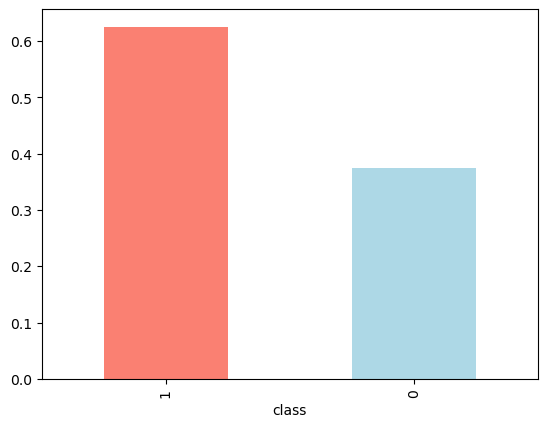

In [29]:
df_data["class"].value_counts(normalize=True).plot(kind ="bar", color=["salmon", "lightblue"]);

In [30]:
df_data.age.value_counts()

age
60.0    19
65.0    17
48.0    12
50.0    12
55.0    12
        ..
90.0     1
27.0     1
83.0     1
4.0      1
79.0     1
Name: count, Length: 77, dtype: int64

In [57]:
pd.crosstab(df_data["class"],df_data.age)

age,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0,12.0,14.0,...,74.0,75.0,76.0,78.0,79.0,80.0,81.0,82.0,83.0,90.0
class,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,1,0,...,1,2,0,0,1,2,0,0,0,0
1,1,1,1,2,1,1,3,1,1,1,...,2,3,5,1,0,2,1,1,1,1


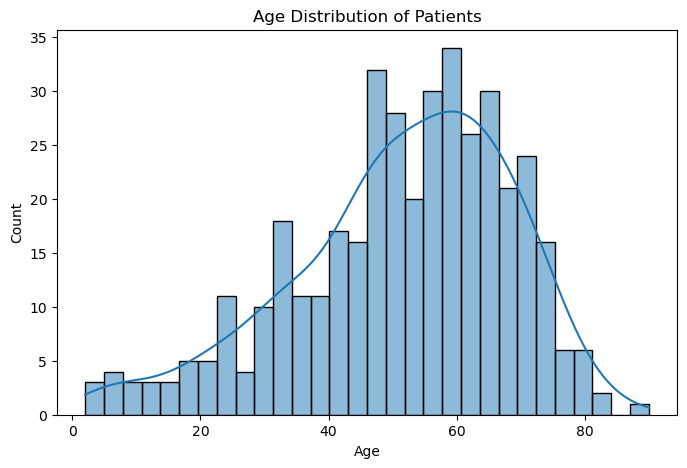

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df_data.age, bins=30, kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

🔍 What Does This Code Do?
1️⃣ df_data.corr()

1. This calculates the correlation matrix of the dataset df_data.
2. It shows how strongly each column (feature) is related to others.
3. Correlation values range from -1 to 1:
     +1 → Strong positive correlation (both increase together).
      0 → No correlation.
     -1 → Strong negative correlation (one increases, the other decreases).

2️⃣ corr_matrix

1. This variable stores the correlation matrix.
2. When printed, it displays a table where:
3. Rows and columns represent dataset features.
4. Each cell shows the correlation between two features.

In [31]:
corr_matrix = df_data.corr()
corr_matrix 

,age,blood pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
age,1.000000,0.148004,-0.180570,0.114764,0.207857,-0.011783,-0.101951,0.159074,0.043573,0.214410,...,-0.211805,0.100061,-0.201051,0.393440,0.363475,0.232951,-0.157741,0.094434,0.050567,0.225405
blood pressure,0.148004,1.000000,-0.182463,0.146593,0.200784,-0.151369,-0.156856,0.059560,0.112173,0.149100,...,-0.292714,0.026067,-0.220822,0.270447,0.228250,0.086618,-0.177601,0.054083,0.194962,0.290600
specific_gravity,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,0.236228,0.345325,-0.290663,-0.220792,-0.326339,...,0.528437,-0.201311,0.466976,-0.366959,-0.393190,-0.154803,0.246822,-0.272476,-0.213276,-0.698957
albumin,0.114764,0.146593,-0.466698,1.000000,0.268070,-0.373927,-0.535157,0.399749,0.367855,0.326400,...,-0.527242,0.200443,-0.454886,0.481724,0.378042,0.236745,-0.330562,0.440893,0.282305,0.599238
sugar,0.207857,0.200784,-0.287993,0.268070,1.000000,-0.074324,-0.168826,0.151445,0.107684,0.639186,...,-0.202573,0.153274,-0.182278,0.293179,0.472330,0.246702,-0.080648,0.130721,0.066348,0.327812
red_blood_cells,-0.011783,-0.151369,0.236228,-0.373927,-0.074324,1.000000,0.377394,-0.102948,-0.184402,-0.153076,...,0.280958,-0.002207,0.202455,-0.140538,-0.145646,-0.111493,0.160868,-0.199285,-0.107625,-0.282642
pus_cell,-0.101951,-0.156856,0.345325,-0.535157,-0.168826,0.377394,1.000000,-0.520118,-0.330401,-0.262259,...,0.418580,-0.107886,0.383240,-0.291719,-0.201032,-0.172295,0.274985,-0.350227,-0.260566,-0.375154
pus_cell_clumps,0.159074,0.059560,-0.290663,0.399749,0.151445,-0.102948,-0.520118,1.000000,0.275082,0.197593,...,-0.294242,0.163456,-0.267982,0.195623,0.165236,0.188029,-0.189688,0.104356,0.175861,0.265313
bacteria,0.043573,0.112173,-0.220792,0.367855,0.107684,-0.184402,-0.330401,0.275082,1.000000,0.085940,...,-0.189822,0.103546,-0.192222,0.089046,0.080070,0.162395,-0.149126,0.134732,0.052208,0.186871
blood_glucose_random,0.214410,0.149100,-0.326339,0.326400,0.639186,-0.153076,-0.262259,0.197593,0.085940,1.000000,...,-0.267580,0.121371,-0.222568,0.369849,0.500618,0.212433,-0.176132,0.101502,0.126854,0.401374


🔍Key Observations from the Correlation Matrix:

1. Serum Creatinine (sc) and Blood Urea (bu) have a `strong positive correlation` with Kidney Disease (class).
    This means higher levels of serum creatinine and blood urea are highly associated with chronic kidney disease (CKD).
    
2. Hemoglobin (hemo) and Packed Cell Volume (pcv) show a strong negative correlation with Kidney Disease.
    Lower hemoglobin and packed cell volume indicate a higher chance of CKD, which makes sense as anemia is common in kidney disease patients.

3. Specific Gravity (sg) and Albumin (al) also show strong negative correlation with CKD.
    Lower specific gravity and higher albumin in urine suggest kidney dysfunction.

4. Diabetes Mellitus (diabetes_mellitus) and Hypertension (hypertension) are positively correlated with CKD.
    This confirms that diabetes and high blood pressure are major risk factors for kidney disease.

5. Pus Cell (pus_cell) and Red Blood Cells (red_blood_cells) are also correlated with CKD.
    This suggests that the presence of abnormal pus cells and red blood cells in urine is a key indicator of kidney disease.

6. Pedal Edema (peda_edema) and Appetite (appetite) show moderate correlation with CKD.
    Poor appetite and swelling (edema) are symptoms of advanced kidney disease.

## Conclusion:

1. The correlation matrix helps in feature selection by identifying the most important predictors for kidney disease.
2. Features like serum creatinine, blood urea, hemoglobin, specific gravity, diabetes, and hypertension are the most significant indicators.
3. Features with very low correlation might not be very useful in prediction and can be dropped to improve model performance.

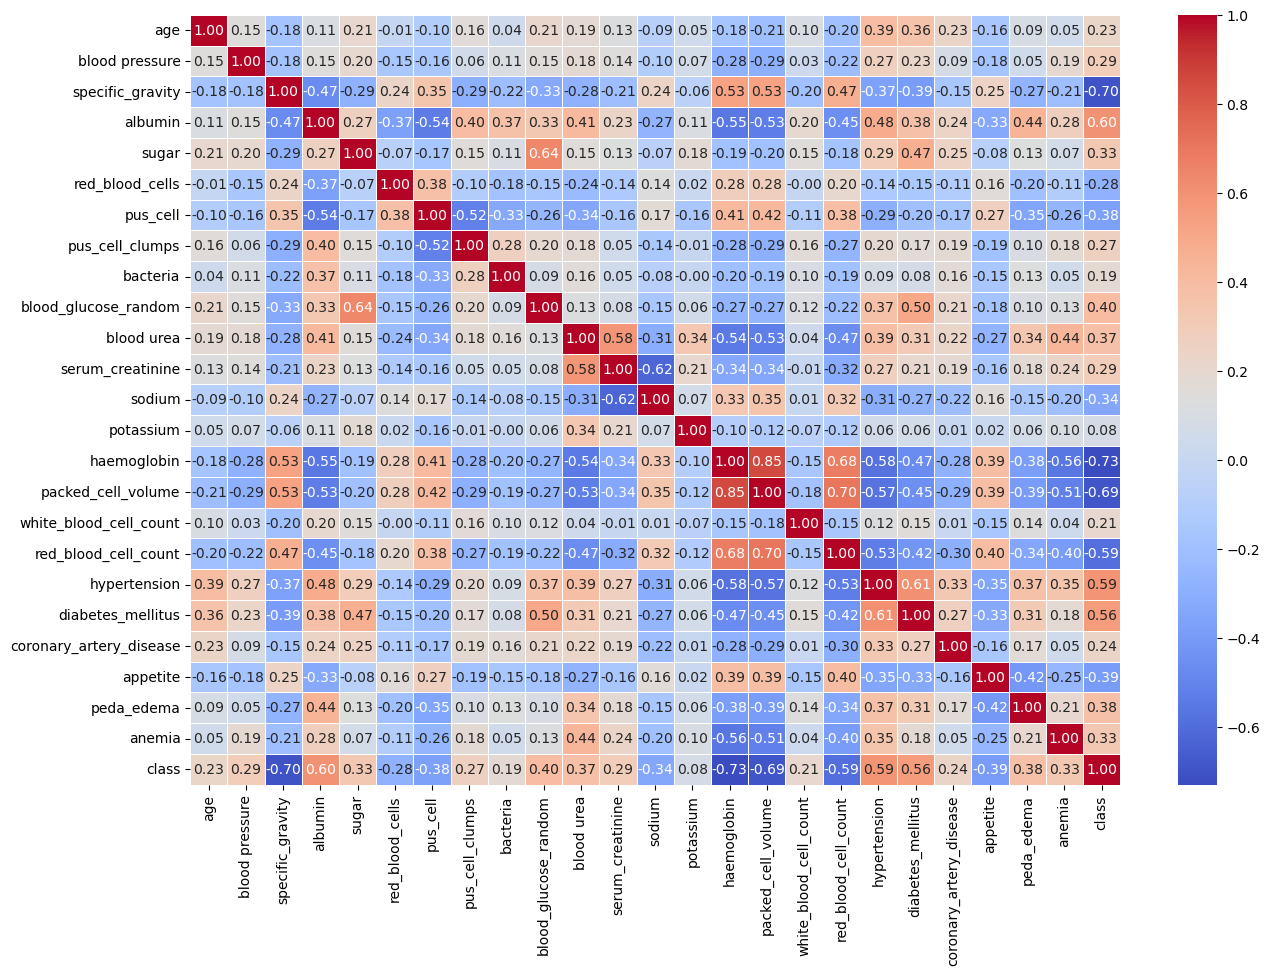

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(df_data.corr(), annot=True, linewidths =0.5, fmt=".2f", cmap="coolwarm")
plt.show()

🔍 What Does This Code Do?
1️⃣ Calculates Correlation Matrix

1. df_data.corr() computes the correlation between all features.
2. .abs() takes the absolute values (so both positive & negative correlations are considered).
3. .unstack() flattens the matrix into a list of feature pairs.
4. .sort_values(ascending=False) sorts the pairs from highest to lowest correlation.

2️⃣ Filters Highly Correlated Features

1. high_corr = high_corr[high_corr >= threshold] → Keeps only pairs with correlation ≥ 0.75.
2. high_corr = high_corr[high_corr < 1] → Excludes self-correlations (where a feature is correlated with itself, always 1).

3️⃣ Displays Feature Pairs That Are Strongly Related

1. Prints feature pairs with a high correlation (≥ 0.75), which might indicate redundant features in the dataset.


In [33]:
threshold = 0.75 # Set correlation threshold

# Find highly correlated pairs
high_corr = df_data.corr().abs().unstack().sort_values(ascending=False)
high_corr = high_corr[high_corr >= threshold]
high_corr = high_corr[high_corr < 1]  # Exclude self-correlations

print("Highly correlated feature pairs:\n", high_corr)

Highly correlated feature pairs:
 haemoglobin         packed_cell_volume    0.854962
packed_cell_volume  haemoglobin           0.854962
dtype: float64


🔍 Explanation:

1️⃣ Drops the "class" column from df_data.
   "class" is the target variable (e.g., CKD or No CKD).
    Keeps all other columns as input features for the model.
    axis=1 → Specifies that we are dropping a column (not a row).

2️⃣ Selects only the "class" column as the target (output) variable.
    This variable will be used for model training to predict CKD presence.

## 5. Modeling

We've explored the data, now we'll try to use machine learning to predict our target variable based on the 13 independent variables.

Remember our problem?

> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

That's what we'll be trying to answer.

And remember our evaluation metric?

> If we can reach 90% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursure this project.

That's what we'll be aiming for.

But before we build a model, we have to get our dataset ready.

Let's look at it again.

In [34]:
## Everything except target variable
X = df_data.drop("class", axis =1)

# Target variable
y= df_data["class"]

### Training and test split

Now comes one of the most important concepts in machine learning, the **training/test split**.

This is where you'll split your data into a **training set** and a **test set**.

You use your training set to train your model and your test set to test it.

The test set must remain separate from your training set.

#### Why not use all the data to train a model?

Let's say you wanted to take your model into the hospital and start using it on patients. How would you know how well your model goes on a new patient not included in the original full dataset you had?

This is where the test set comes in. It's used to mimic taking your model to a real environment as much as possible.

And it's why it's important to never let your model learn from the test set, it should only be evaluated on it.

To split our data into a training and test set, we can use Scikit-Learn's [`train_test_split()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) and feed it our independent and dependent variables (`X` & `y`).

## Splits the Dataset into Training & Testing Sets, Reserves 20% of the data for testing, Ensures reproducibility (same split every time).

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)
print(f"'X' shape:{X_train.shape}")
print(f"'X_test' shape:{X_test.shape}")

'X' shape:(320, 24)
'X_test' shape:(80, 24)


In [36]:
X_train.shape

(320, 24)

In [37]:
y_train, len(y_train)

(368    0
 37     1
 284    0
 210    1
 242    1
       ..
 374    0
 317    0
 143    1
 318    0
 132    1
 Name: class, Length: 320, dtype: int64,
 320)

In [38]:
X_test.shape

(80, 24)

In [39]:
y_test, len(y_test)


(121    1
 162    1
 338    0
 375    0
 262    0
       ..
 117    1
 12     1
 102    1
 56     1
 260    0
 Name: class, Length: 80, dtype: int64,
 80)

Explanation:
1. Creates a Logistic Regression Model(Initializes a Logistic Regression model from sklearn.linear_model, used binary classification, Default paramenters used)
2. Trains (Fits) the Model on Training Data(Training feature set)

🔥 Why Is This Important?
✅ Learns the relationship between input features & target.
✅ Used for medical diagnosis tasks (like CKD detection).
✅ Quick and interpretable model for binary classification.

In [40]:
model = LogisticRegression()
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Makes Predictions on Test Data, that contains predicated status for all test samples.

In [41]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

Selects only numeric columns from the dataset 

In [42]:
df_filtered = df_data.select_dtypes(include=['number'])  # Keep only numeric columns

In [43]:
print(df_data.head())

    age  blood pressure  specific_gravity  albumin  sugar  red_blood_cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

   pus_cell  pus_cell_clumps  bacteria  blood_glucose_random  ...  \
0         1                0         0            121.000000  ...   
1         1                0         0            148.036517  ...   
2         1                0         0            423.000000  ...   
3         0                1         0            117.000000  ...   
4         1                0         0            106.000000  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                44.0                  7800.0

In [44]:
threshold = 0.75  # Adjust as needed

# Compute absolute correlation matrix
corr_matrix = df_data.corr().abs()

# Find highly correlated feature pairs
high_corr = (
    corr_matrix.unstack()
    .sort_values(ascending=False)
    .drop_duplicates()
)

# Filter for correlations above threshold but below 1 (to exclude self-correlation)
high_corr = high_corr[(high_corr >= threshold) & (high_corr < 1)]

# Display top correlated pairs
print("Highly correlated feature pairs:\n", high_corr)

Highly correlated feature pairs:
 haemoglobin  packed_cell_volume    0.854962
dtype: float64


In [45]:
# Identify columns to drop (keeping only one from each high-correlation pair)
to_drop = set()

for (col1, col2), corr_value in high_corr.items():
    if col1 not in to_drop and col2 not in to_drop:
        to_drop.add(col2)  # Keep col1, drop col2

# Drop the identified features
df_reduced = df_data.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} highly correlated features:", to_drop)

Dropped 1 highly correlated features: {'packed_cell_volume'}


In [46]:
print("Original shape:", df_data.shape)
print("Reduced shape:", df_reduced.shape)

Original shape: (400, 25)
Reduced shape: (400, 24)


In [47]:
target = "class"

# Define features (excluding the target)
X = df_reduced.drop(columns=[target])
y = df_reduced[target]

print("Feature Set Shape:", X.shape)
print("Target Shape:", y.shape)

Feature Set Shape: (400, 23)
Target Shape: (400,)


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)

Training Set Shape: (320, 23)
Testing Set Shape: (80, 23)


1. Measures the model's performance
2. Helps compare different models (e.g., Logistic Regression )
3. Indicates whether further improvements (e.g., feature engineering, hyperparameter tuning) are needed

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.96


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1. Generates a summary of model performance.
2. Computes precision, recall, F1-score, and support for each class.
3. Helps evaluate the model beyond just accuracy.

In [50]:
from sklearn.metrics import classification_report

# Print detailed classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95        30
           1       0.98      0.96      0.97        50

    accuracy                           0.96        80
   macro avg       0.96      0.96      0.96        80
weighted avg       0.96      0.96      0.96        80



🔹 Creates a dictionary of models to test.
🔹 Each key is the model name, and the value is the corresponding algorithm.
🔹 Stores accuracy scores of each model.
🔹 Compares different models to find the best performer.
🔹 Helps decide which model to use for kidney disease prediction.

In [51]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss"),
    "SVM": SVC(kernel="linear")
}

# Store accuracy results
accuracy_results = {}

# Train & Evaluate Each Model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.96
Random Forest Accuracy: 1.00
XGBoost Accuracy: 1.00

C:\Users\vijir\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [20:05:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



SVM Accuracy: 0.96


1. This code visualizes the accuracy of different models using a bar chart. 
2. Defines the plot size (8 inches wide, 5 inches tall).
3. X-axis → Model names.
4. Y-axis → Accuracy scores.
5. Color-coded bars for easy comparison.
6. Improves readability by adding axis labels and a title.
7. Limits Y-axis between 0 and 1 (since accuracy is a percentage).

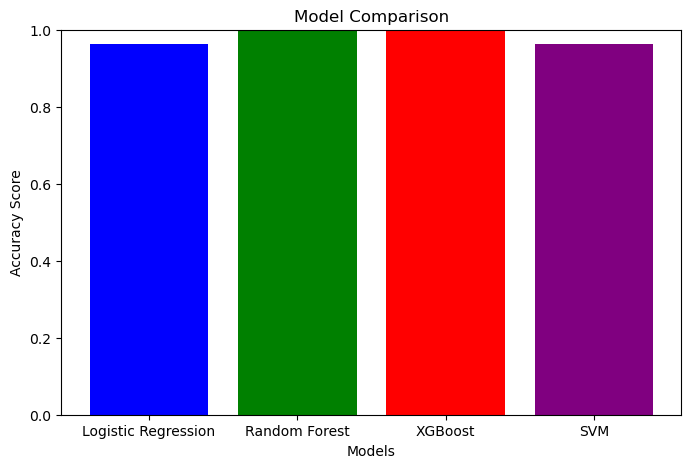

In [52]:
# Plot Accuracy Comparison
plt.figure(figsize=(8,5))
plt.bar(accuracy_results.keys(), accuracy_results.values(), color=["blue", "green", "red", "purple"])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.ylim(0, 1)  # Accuracy range from 0 to 1
plt.show()

## Let's proceed step by step with hyperparameter tuning and cross-validation. We'll use GridSearchCV to fine-tune models and Stratified K-Fold Cross-Validation for better performance evaluation.

This code tunes the hyperparameters of a Logistic Regression model using GridSearchCV to find the best settings for improved accuracy.

1. Define Hyperparameter Grid
   C: Controls regularization (higher values reduce regularization).
   solver: Defines different optimization algorithms used for training.

2. Initialize Logistic Regression Model
   Creates a Logistic Regression model without predefined parameters.

3. Set Up GridSearchCV
   GridSearchCV tries all combinations of parameters in param_grid.
   cv=5 → Uses 5-fold cross-validation to get stable results.
   scoring='accuracy' → Selects the model with the best accuracy.
   n_jobs=-1 → Uses all available CPU cores for faster computation.

4. Train and Optimize the Model
   Fits the model using all parameter combinations and finds the best one

5. Print the Best Parameters & Accuracy
   Outputs the optimal values for C and solver.
   Displays the highest accuracy achieved with the best settings.

In [53]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']
}

log_reg = LogisticRegression()
grid_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_log_reg.fit(X_train, y_train)

print("Best Parameters for Logistic Regression:", grid_log_reg.best_params_)
print("Best Accuracy:", grid_log_reg.best_score_)

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best Accuracy: 0.975


## Random Forest

## This code tunes the hyperparameters of a Random Forest Classifier using GridSearchCV to find the best-performing settings.

1. Define Hyperparameter Grid
   n_estimators: Controls how many decision trees are used in the forest.
   max_depth: Limits how deep each tree can grow.
   min_samples_split: Sets the minimum number of samples required to split a node.

2. Initialize Random Forest Model
   Creates a Random Forest model with a fixed random_state for reproducibility.

3. Set Up GridSearchCV
   GridSearchCV tests all parameter combinations from param_grid.
   cv=5 → Uses 5-fold cross-validation to ensure robust evaluation.
   scoring='accuracy' → Selects the model with the highest accuracy.
   n_jobs=-1 → Uses all CPU cores to speed up computation.

4. Train and Optimize the Model
    Trains the model on X_train and y_train using all parameter combinations.

5. Print the Best Parameters & Accuracy
   Outputs the best combination of n_estimators, max_depth, and min_samples_split.
   Displays the highest accuracy achieved with the optimal settings.


In [54]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Parameters for Random Forest:", grid_rf.best_params_)
print("Best Accuracy:", grid_rf.best_score_)

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.99375


## XGBoost

## This code optimizes an XGBoost Classifier using GridSearchCV to find the best hyperparameters for accuracy.

1. Define Hyperparameter Grid
   n_estimators: Number of boosting rounds (50, 100, 200).
   max_depth: Depth of each tree (3, 5, 7).
   learning_rate: Controls how much the model learns per step (0.01, 0.1, 0.2).

2. Initialize XGBoost model:
   eval_metric='mlogloss' is used to prevent warnings (default for classification).

3. Set Up and run GridSearchCV
   Tests all parameter combinations using 5-fold cross-validation.
   Finds the best combination for highest accuracy.

4. Train and Optimize the Model
    Trains the model on X_train and y_train using all parameter combinations.

5. Print the Best Parameters & Accuracy
   Outputs the best hyperparameter values.
   Displays the highest accuracy achieved.


In [55]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2]
}

xgb = XGBClassifier(eval_metric='mlogloss')  # No need for `use_label_encoder`
grid_xgb = GridSearchCV(xgb, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", grid_xgb.best_params_)
print("Best Accuracy:", grid_xgb.best_score_)

Best Parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Best Accuracy: 0.990625


## SVM

## This code optimizes an SVM (Support Vector Machine) model using GridSearchCV to find the best hyperparameters for achieving the highest accuracy.

1. Define Hyperparameter Grid
   C': Regularization strength (0.1, 1, 10, 100). Higher values reduce misclassification but risk overfitting.
  'kernel': Defines the decision boundary ('linear' for straight lines, 'rbf' for complex shapes).
   'gamma': Controls influence of individual data points ('scale' adapts automatically, 'auto' is based on features).

2. Initialize SVM model:
   Uses default settings before tuning.

3. Set Up and run GridSearchCV
   Tests all parameter combinations using 5-fold cross-validation.
   Finds the best combination for highest accuracy.

4. Train and Optimize the Model
    Trains the model on X_train and y_train using all parameter combinations.

5. Print the Best Parameters & Accuracy
   Outputs the optimal hyperparameter values.
   Displays the highest accuracy achieved.


In [59]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC()
grid_svm = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)
print("Best Accuracy:", grid_svm.best_score_)


Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best Accuracy: 0.965625


## GridsearchCV

In [60]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

random_forest = RandomForestClassifier(random_state=42)

random_forest_grid = GridSearchCV(random_forest, param_grid, cv=5, n_jobs=-1)
random_forest_grid.fit(X_train, y_train)

best_random_forest = random_forest_grid.best_estimator_  # Extract the best mode

## RandomizedSearchCV

In [ ]:
random_forest_random = RandomizedSearchCV(
    random_forest, param_distributions=param_grid, n_iter=10, cv=5, n_jobs=-1, random_state=42
)
random_forest_random.fit(X_train, y_train)

best_random_forest = random_forest_random.best_estimator_

In [ ]:
best_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
best_random_forest.fit(X_train, y_train)

rf_feature_importance = best_random_forest.feature_importances_

## Model Comparioson
## This code evaluates multiple machine learning models (Logistic Regression, Random Forest, XGBoost, and SVM) using cross-validation, accuracy scores, and ROC-AUC curves to compare their performance.

1. Retrieve the Best Tuned Models:
    Stores the best model from GridSearchCV for each algorithm.

2. Perform 5-Fold Cross-Validation:
   Uses Stratified K-Fold Cross-Validation to split data while maintaining class balance.
   Ensures the model is tested on different subsets for robust evaluation.

3. Compute Accuracy Scores for Each Model:
   cross_val_score() runs 5-fold cross-validation and calculates the mean accuracy and standard deviation.
   Results are stored and printed for performance comparison.

4. Compute & Plot ROC-AUC Curves:
   Only models with probability estimates (e.g., Logistic Regression, Random Forest, XGBoost) are used for ROC-AUC analysis.
   Computes the False Positive Rate (FPR) & True Positive Rate (TPR).
   Plots the ROC Curve to visualize model performance.

5. Final ROC Curve Plot & AUC Score Display:
   ROC Curve Comparison shows how well models distinguish between classes.
   Higher AUC = Better Performance.

## Key Points:
1. Displays model accuracy from cross-validation.
2. Plots ROC curves for models supporting probability estimation.
3. Prints AUC scores to compare model performance.

Logistic Regression: Mean Accuracy = 0.9781, Std = 0.0159
Random Forest: Mean Accuracy = 0.9844, Std = 0.0140
XGBoost: Mean Accuracy = 0.9781, Std = 0.0234
SVM: Mean Accuracy = 0.9594, Std = 0.0272


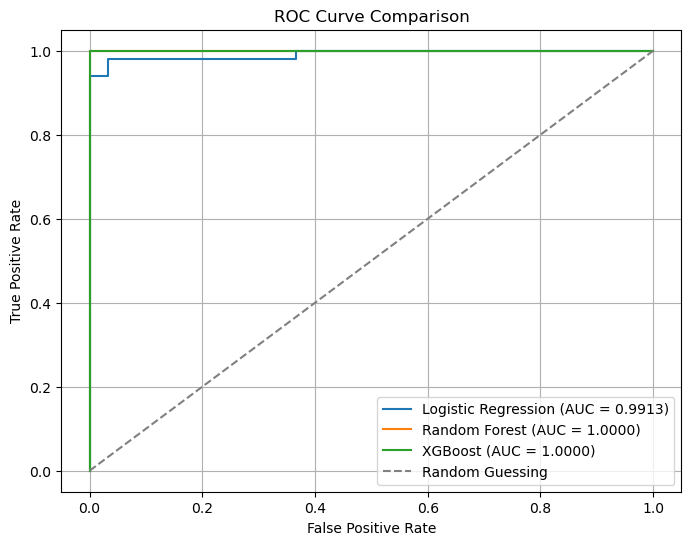


AUC Scores for Models:
Logistic Regression: AUC = 0.9913
Random Forest: AUC = 1.0000
XGBoost: AUC = 1.0000


In [ ]:

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Ensure models support probability estimates
best_models = {
    'Logistic Regression': grid_log_reg.best_estimator_,
    'Random Forest': grid_rf.best_estimator_,
    'XGBoost': grid_xgb.best_estimator_,
    'SVM': grid_svm.best_estimator_
}

# 5-Fold Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store results
model_scores = {}
auc_scores = {}

# Initialize ROC Curve plot
plt.figure(figsize=(8, 6))
plotted_any_model = False  

for name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    model_scores[name] = (scores.mean(), scores.std())

    print(f"{name}: Mean Accuracy = {scores.mean():.4f}, Std = {scores.std():.4f}")

    # Compute ROC-AUC only for models that support probability prediction
    if hasattr(model, "predict_proba"):
        y_probs = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
        
        fpr, tpr, _ = roc_curve(y_test, y_probs)
        auc_score = roc_auc_score(y_test, y_probs)
        auc_scores[name] = auc_score

        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.4f})")
        plotted_any_model = True  

# Only plot if at least one model was added
if plotted_any_model:
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guessing")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("No models with probability estimates found! Cannot plot ROC curves.")

# Print AUC Scores
print("\nAUC Scores for Models:")
for name, auc in auc_scores.items():
    print(f"{name}: AUC = {auc:.4f}")

## This code visualizes the accuracy scores of different models using a bar chart for easy comparison.

A bar chart showing accuracy scores for all models 
Helps quickly identify the best-performing model

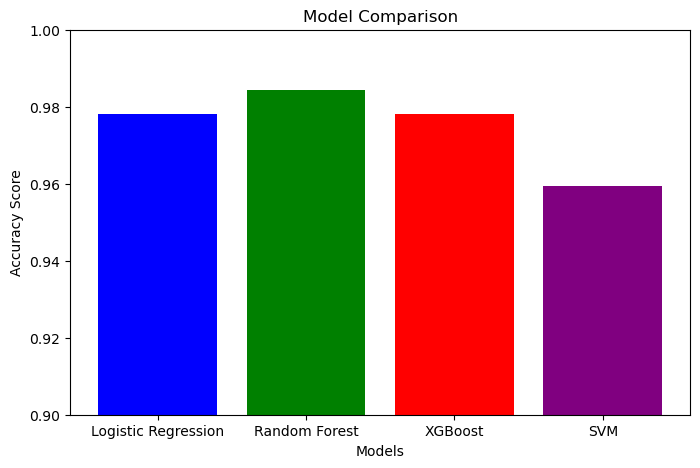

In [ ]:
# --- Bar Plot: Model Comparison ---
plt.figure(figsize=(8,5))
plt.bar(model_scores.keys(), [score[0] for score in model_scores.values()], color=['blue', 'green', 'red', 'purple'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Comparison")
plt.ylim(0.9, 1.0)  # Adjust y-axis based on your accuracy range
plt.show()

## Feature Importance
## This code visualizes the top 10 most important features for tree-based models (Random Forest & XGBoost) using a horizontal bar chart.

1. Initialize a Dictionary: Creates an empty dictionary to store feature importance scores.
2. Extract Feature Importance for Tree-Based Models: Only stores feature importance for models that support it (Random Forest & XGBoost).
3. Check if Data Exists Before Plotting: Ensures that feature importance data is available before attempting to plot.
4. Plot Feature Importance (Bar Chart): Creates a 10x5-inch figure for better visualization.
5. Sort and Select Top 10 Features: Sorts features based on importance in descending order, Selects the top 10 most important features.
6. Create Horizontal Bar Chart: Plots a horizontal bar chart for each model.
7. Customize the Plot: Labels the axes and adds a legend, Inverts the y-axis to show the most important feature at the top.
8. Show or Handle Missing Data: Displays the feature importance chart, If no tree-based models are available, it prints an error message.

## Key Points:
A horizontal bar chart showing the top 10 most important features
Helps understand which features contribute most to predictions

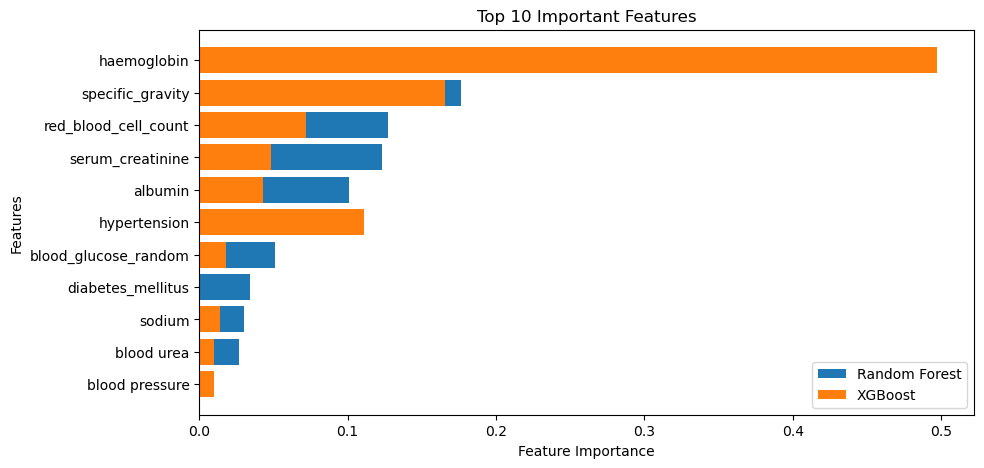

In [ ]:
# Initialize feature importance dictionary
feature_importances = {}

# Store feature importance only for tree-based models
for name, model in best_models.items():
    if name in ['Random Forest', 'XGBoost']:  
        feature_importances[name] = model.feature_importances_

# Ensure feature_importances is not empty before plotting
if feature_importances:
    plt.figure(figsize=(10, 5))
    
    for model_name, importances in feature_importances.items():
        sorted_idx = np.argsort(importances)[::-1]  # Sort feature importance in descending order
        top_features = [X_train.columns[i] for i in sorted_idx[:10]]  # Top 10 features
        top_importances = importances[sorted_idx[:10]]

        plt.barh(top_features, top_importances, label=model_name)

    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.title("Top 10 Important Features")
    plt.legend()
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()
else:
    print("No feature importance data found. Ensure that Random Forest or XGBoost models are used.")


## This code plots confusion matrices for all the trained models (Logistic Regression, Random Forest, XGBoost, and SVM). The confusion matrix helps visualize the performance of each model in terms of true positives, false positives, true negatives, and false negatives.

1. Set Figure Size: Creates a 12x10-inch figure for better visualization.
2. Loop Through Each Model: Iterates over each best-trained model from the dictionary best_models, i keeps track of the model index for subplot positioning.
3. Get Predictions for Each Model: Uses the trained model to predict the class labels for the test set.
4. Compute the Confusion Matrix: Generates a confusion matrix comparing true vs. predicted labels.
5. Create Subplots for Each Model: Arranges the plots in a 2x2 grid for four models, i + 1 ensures each model gets its own subplot.
6. Plot the Confusion Matrix as a Heatmap:
   Displays the actual numbers inside the heatmap
   Ensures integer formatting for better readability
   Uses blue color shades for visualization.
   Labels the axes (Negative / Positive).
7. Label the Axes & Title for Each Model: Titles each plot with the model name, Labels the X-axis (Predicted) and Y-axis (Actual/True Labels).


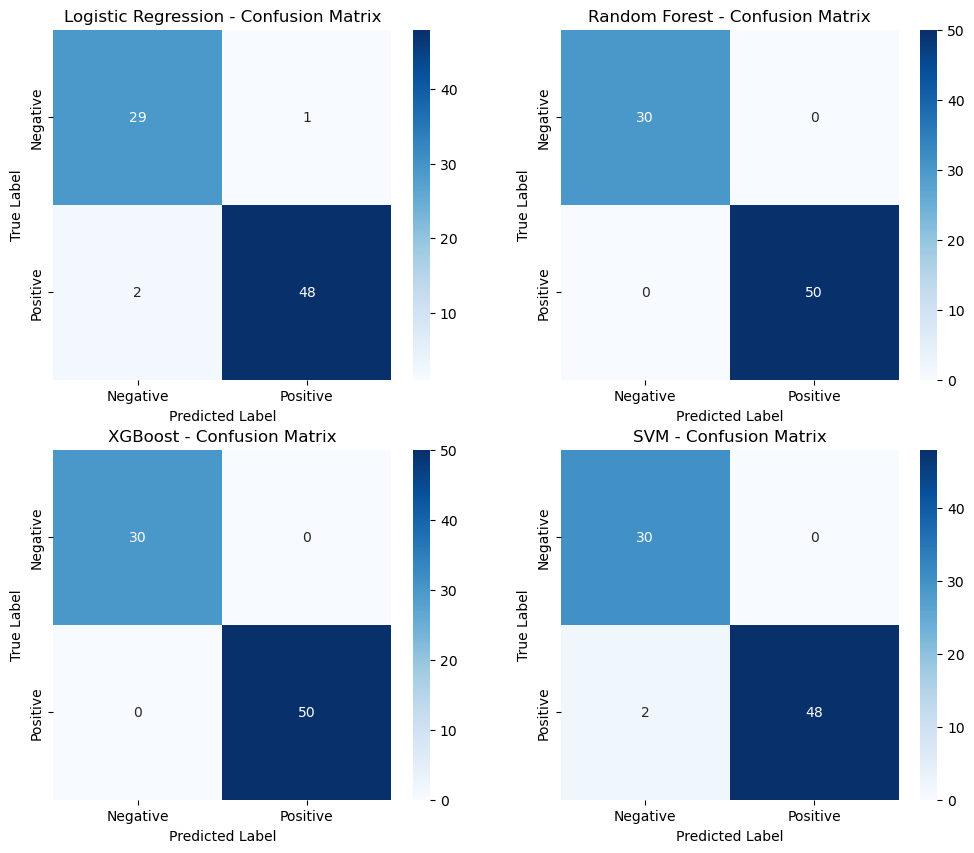

In [ ]:
plt.figure(figsize=(12, 10))

# Loop through models and plot their confusion matrices
for i, (name, model) in enumerate(best_models.items()):
    y_pred = model.predict(X_test)  # Get predictions

    cm = confusion_matrix(y_test, y_pred)  # Compute confusion matrix

    # Plot confusion matrix
    plt.subplot(2, 2, i + 1)  # Arrange subplots in a 2x2 grid
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} - Confusion Matrix")

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define stratified K-Fold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Dictionary to store results
cv_metrics = {}

# Loop through models
for name, model in best_models.items():
    cv_metrics[name] = {
        "Accuracy": cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(accuracy_score)).mean(),
        "Precision": cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(precision_score)).mean(),
        "Recall": cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(recall_score)).mean(),
        "F1 Score": cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(f1_score)).mean()
    }
    # Add ROC AUC score if the model supports probability predictions
    if hasattr(model, "predict_proba"):
        cv_metrics[name]["ROC AUC"] = cross_val_score(model, X_train, y_train, cv=cv, scoring=make_scorer(roc_auc_score)).mean()

# Print results
import pandas as pd
cv_results_df = pd.DataFrame(cv_metrics).T
print(cv_results_df)

                     Accuracy  Precision  Recall  F1 Score   ROC AUC
Logistic Regression  0.978125   0.984994   0.980  0.982404  0.977500
Random Forest        0.984375   0.980598   0.995  0.987653  0.980833
XGBoost              0.978125   0.985000   0.980  0.982468  0.977500
SVM                  0.959375   0.965122   0.970  0.967531       NaN


## Cross Validate Model Performance
This code visualizes cross-validation results for different models using a bar chart. It helps compare models based on multiple performance metrics such as accuracy, precision, recall, and F1-score.

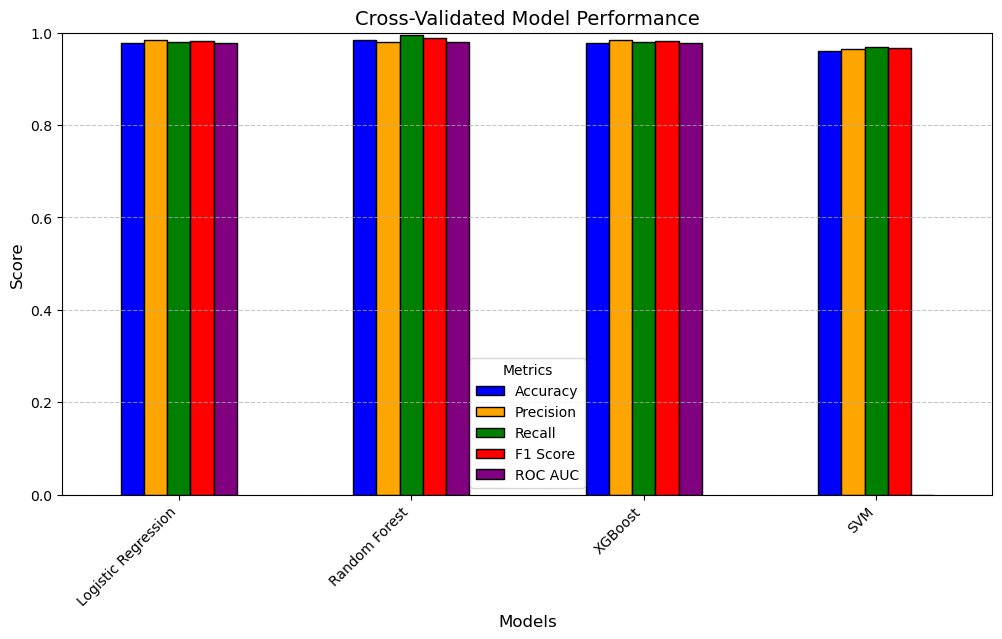

In [ ]:
# Convert dictionary to DataFrame for easy plotting
cv_results_df = pd.DataFrame(cv_metrics).T

# Define colors for different metrics
metric_colors = ["blue", "orange", "green", "red", "purple"]

# Plotting
cv_results_df.plot(kind="bar", figsize=(12,6), color=metric_colors, edgecolor='black')

# Customizing plot
plt.title("Cross-Validated Model Performance", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics", fontsize=10)
plt.ylim(0, 1)  # Ensure all metrics fit within 0-1 range
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()

## This code saves the trained XGBoost model using joblib, so it can be loaded and used later without retraining.

1. Import Joblib: joblib is a library used to efficiently save and load large machine learning models.
2. Save the Best XGBoost Model:
     best_models['XGBoost'] → Retrieves the best-tuned XGBoost model from the dictionary.
     "best_xgboost_model.pkl" → Saves the model as a pickle (.pkl) file.
      Joblib is preferred over pickle for saving large models with NumPy arrays efficiently.


Key points:
1. The XGBoost model is saved as best_xgboost_model.pkl.
2. Can be loaded later for making predictions without retraining.

In [ ]:
import joblib
joblib.dump(best_models['XGBoost'], "best_xgboost_model.pkl")

['best_xgboost_model.pkl']

## Loading some sample datas

In [ ]:
import pandas as pd
df = pd.read_csv("C:\\Viji_DS_GT\\ML\\CSV Files\\test_sample_Kidney_disease.csv")
print(df.head())

    age  blood pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  40.0           120.0             1.020      0.0    0.0        abnormal   
1  65.0           140.0             1.005      4.0    3.0          normal   
2  35.0           110.0             1.015      0.0    0.0          normal   
3  70.0           160.0             1.010      3.0    2.0        abnormal   
4  50.0           130.0             1.015      1.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                  90.0  ...   
1  abnormal         present  notpresent                 200.0  ...   
2    normal      notpresent  notpresent                  85.0  ...   
3  abnormal         present     present                 180.0  ...   
4    normal      notpresent  notpresent                 100.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                48.0                  8500.0

## This code saves the trained model using joblib, so it can be reloaded later for predictions without retraining.

In [ ]:
import joblib
joblib.dump(model, "model.pkl")  # Save the trained model

['model.pkl']

In [ ]:
model = joblib.load("model.pkl")  # Load the model

## This code checks if a CSV file exists at the given path and then loads it into a DataFrame using pandas.

1. If the file exists → Loads the dataset and prints the first 5 rows.
2. If the file does not exist → Shows an error message.

In [ ]:
import os

file_path = "C:\\Viji_DS_GT\\ML\\CSV Files\\test_sample_Kidney_disease.csv"

# Check if the file exists
if os.path.exists(file_path):
    print("File found! Loading...")
    df = pd.read_csv(file_path)
    print(df.head())
else:
    print("❌ File not found. Check the path and file name.")

File found! Loading...
    age  blood pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  40.0           120.0             1.020      0.0    0.0        abnormal   
1  65.0           140.0             1.005      4.0    3.0          normal   
2  35.0           110.0             1.015      0.0    0.0          normal   
3  70.0           160.0             1.010      3.0    2.0        abnormal   
4  50.0           130.0             1.015      1.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                  90.0  ...   
1  abnormal         present  notpresent                 200.0  ...   
2    normal      notpresent  notpresent                  85.0  ...   
3  abnormal         present     present                 180.0  ...   
4    normal      notpresent  notpresent                 100.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                48.0 

In [ ]:
import os
print("Current Working Directory:", os.getcwd())  # Shows the current directory

Current Working Directory: c:\Viji_DS_GT\ML\Codings


In [ ]:
import os

search_directory = "c:\\Viji_DS_GT\\ML"  # Adjust if needed

for root, dirs, files in os.walk(search_directory): #traverses the given directory (search_directory) and its subdirectories.
    for file in files:
        if file == "model.pkl":
            print("✅ Model found at:", os.path.join(root, file))

✅ Model found at: c:\Viji_DS_GT\ML\Codings\model.pkl


In [ ]:
import joblib

model_path = "c:\\Viji_DS_GT\\ML\\Codings\\model.pkl"  # Replace with actual path
model = joblib.load(model_path)
print("✅ Model Loaded Successfully!")

✅ Model Loaded Successfully!


In [ ]:
joblib.dump(model, "c:\\Viji_DS_GT\\ML\\Codings\\model.pkl")  # Saves in Codings folder
print("✅ Model saved at:", os.path.abspath("c:\\Viji_DS_GT\\ML\\Codings\\model.pkl"))

✅ Model saved at: c:\Viji_DS_GT\ML\Codings\model.pkl


In [ ]:
import pandas as pd

# Load test dataset
test_data_path = "c:\\Viji_DS_GT\\ML\\CSV Files\\test_sample_Kidney_disease.csv"  # Update path if needed
df_test = pd.read_csv(test_data_path)

# Display first few rows to check the data
print(df_test.head())

    age  blood pressure  specific_gravity  albumin  sugar red_blood_cells  \
0  40.0           120.0             1.020      0.0    0.0        abnormal   
1  65.0           140.0             1.005      4.0    3.0          normal   
2  35.0           110.0             1.015      0.0    0.0          normal   
3  70.0           160.0             1.010      3.0    2.0        abnormal   
4  50.0           130.0             1.015      1.0    0.0          normal   

   pus_cell pus_cell_clumps    bacteria  blood_glucose_random  ...  \
0    normal      notpresent  notpresent                  90.0  ...   
1  abnormal         present  notpresent                 200.0  ...   
2    normal      notpresent  notpresent                  85.0  ...   
3  abnormal         present     present                 180.0  ...   
4    normal      notpresent  notpresent                 100.0  ...   

   packed_cell_volume  white_blood_cell_count  red_blood_cell_count  \
0                48.0                  8500.0

In [ ]:
# Sample test cases (Replace with real data)
sample_data = pd.DataFrame([
    [55, 150, 1.010, 2, 0, 1, 3.8, 10.5, 1, 1],  # CKD (Positive)
    [40, 120, 1.020, 0, 0, 0, 0.9, 15.0, 0, 0],  # No CKD (Negative)
], columns=["Age", "Blood Pressure", "Specific Gravity", "Albumin", "Sugar", 
            "Red Blood Cells", "Serum Creatinine", "Hemoglobin", "Diabetes", "Hypertension"])

In [ ]:
expected_features = model.feature_names_in_  # This works for scikit-learn models

# Get the actual features in test data
actual_features = df_test.columns

# Check for missing or extra features
missing_features = set(expected_features) - set(actual_features)
extra_features = set(actual_features) - set(expected_features)

print("✅ Expected Features:", list(expected_features))
print("❌ Missing Features in Test Data:", missing_features)
print("⚠️ Extra Features in Test Data:", extra_features)

✅ Expected Features: ['age', 'blood pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood urea', 'serum_creatinine', 'sodium', 'potassium', 'haemoglobin', 'white_blood_cell_count', 'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema', 'anemia']
❌ Missing Features in Test Data: set()
⚠️ Extra Features in Test Data: {'class', 'packed_cell_volume'}


In [ ]:
df_test = df_test[expected_features]  # Keep only the necessary features

In [ ]:
for feature in missing_features:
    df_test[feature] = 0  # You can replace 0 with a better default value if needed

In [ ]:
print("Model trained on features:", model.feature_names_in_)

Model trained on features: ['age' 'blood pressure' 'specific_gravity' 'albumin' 'sugar'
 'red_blood_cells' 'pus_cell' 'pus_cell_clumps' 'bacteria'
 'blood_glucose_random' 'blood urea' 'serum_creatinine' 'sodium'
 'potassium' 'haemoglobin' 'white_blood_cell_count' 'red_blood_cell_count'
 'hypertension' 'diabetes_mellitus' 'coronary_artery_disease' 'appetite'
 'peda_edema' 'anemia']


In [ ]:
# Get the exact feature names used in training
expected_features = model.feature_names_in_

# Filter test data to match model's feature names
df_test = df_test[expected_features]

print("✅ Test dataset now matches the model's features!")

✅ Test dataset now matches the model's features!


In [ ]:
missing_values = df_test.isnull().sum()
print(missing_values[missing_values > 0])  # Shows only columns with missing values

age                        3
blood pressure             3
specific_gravity           3
albumin                    3
sugar                      3
red_blood_cells            3
pus_cell                   3
pus_cell_clumps            3
bacteria                   3
blood_glucose_random       3
blood urea                 3
serum_creatinine           3
sodium                     3
potassium                  3
haemoglobin                3
white_blood_cell_count     3
red_blood_cell_count       3
hypertension               3
diabetes_mellitus          3
coronary_artery_disease    3
appetite                   3
peda_edema                 3
anemia                     3
dtype: int64


In [ ]:
df_test.fillna(df_test.median(), inplace=True)  # Fill NaN with median values

C:\Users\vijir\AppData\Local\Temp\ipykernel_22996\766910351.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(df_test.median(), inplace=True)  # Fill NaN with median values


In [ ]:
df_test.fillna(df_test.mode().iloc[0], inplace=True)

C:\Users\vijir\AppData\Local\Temp\ipykernel_22996\2028599665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.fillna(df_test.mode().iloc[0], inplace=True)


In [ ]:
df_test.dropna(inplace=True)

C:\Users\vijir\AppData\Local\Temp\ipykernel_22996\3451913678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.dropna(inplace=True)


In [ ]:
predictions = model.predict(df_test)
df_test["Predicted_CKD_Status"] = ["CKD (Positive)" if pred == 1 else "No CKD (Negative)" for pred in predictions]
print(df_test[["age", "blood pressure", "Predicted_CKD_Status"]].head())

    age  blood pressure Predicted_CKD_Status
0  40.0           120.0       CKD (Positive)
1  65.0           140.0       CKD (Positive)
2  35.0           110.0       CKD (Positive)
3  70.0           160.0       CKD (Positive)
4  50.0           130.0       CKD (Positive)
